#Visualización de los resultados Grupo 11

In [5]:
# Grafo de la Red de TransMilenio en Bogotá

# Instalación de librerías necesarias
!pip install geopandas networkx h5py matplotlib contextily pandas


<ipython-input-9-e71f3171cfab>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap("tab10", num_rutas)  # Usar colores predefinidos de Matplotlib


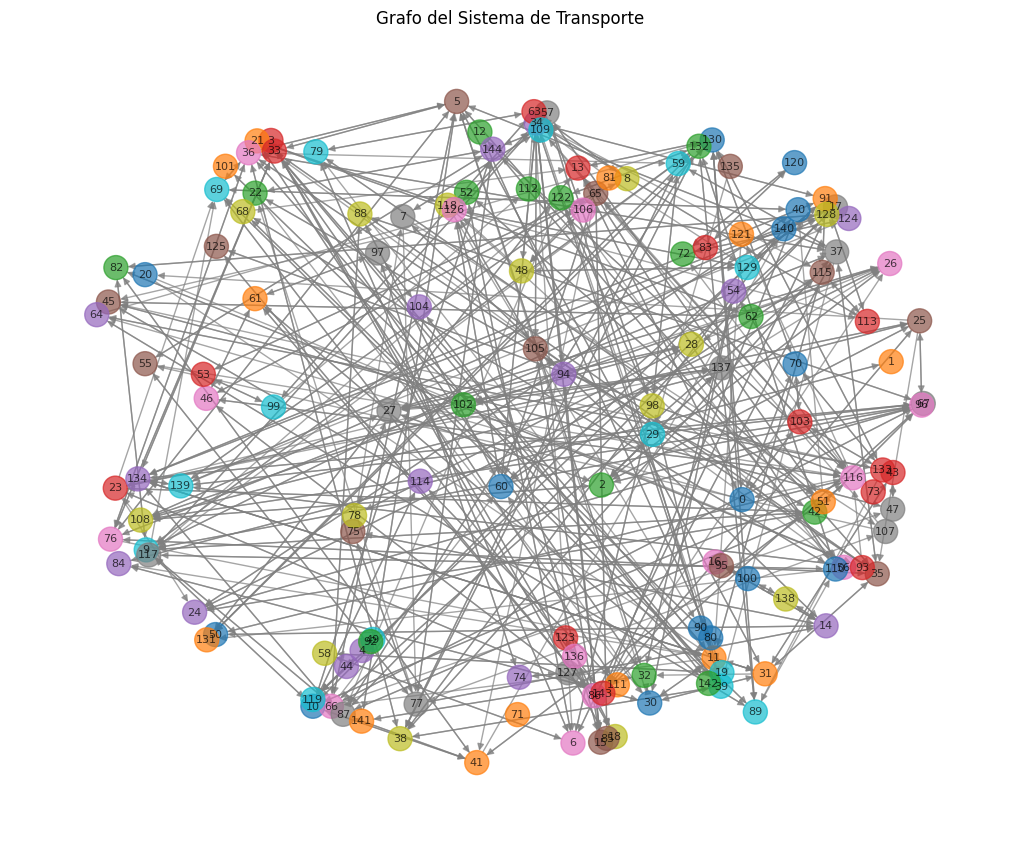

In [9]:
import h5py
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Cargar la última matriz de adyacencia desde el archivo HDF5
hdf5_filename = "/content/matrices_adyacencia.h5"

with h5py.File(hdf5_filename, "r") as f:
    keys = sorted(list(f.keys()))  # Orden lexicográfico de las claves
    target_key = keys[9]  # Seleccionamos la matriz número 399
    adj_matrix = f[target_key][...]

# Crear el grafo dirigido a partir de la matriz de adyacencia
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Asignar colores a las líneas (rutas) de transporte de forma aleatoria
num_rutas = 10  # Ajusta según el número de líneas reales del sistema
colores = plt.cm.get_cmap("tab10", num_rutas)  # Usar colores predefinidos de Matplotlib

# Asignar un color a cada nodo basándonos en su grupo (simulamos líneas de transporte)
node_colors = [colores(i % num_rutas) for i in range(len(G.nodes))]

# Posicionamiento de nodos
pos = nx.spring_layout(G, seed=42)  # Distribución automática, mejoramos luego con datos reales

# Dibujar el grafo con nodos y conexiones
plt.figure(figsize=(10, 8))
nx.draw(
    G,
    pos,
    node_size=300,
    node_color=node_colors,
    edge_color="gray",
    alpha=0.7,
    arrows=True,
    with_labels=True,
    font_size=8,
)

plt.title(f"Grafo del Sistema de Transporte")
plt.show()


Todos los archivos fueron encontrados correctamente.
Se cargaron 149 estaciones desde estaciones.csv
Matrices de adyacencia disponibles: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '8', '9']
Solo existen 75 matrices. Se cargará '0'.
Tamaño de la matriz de adyacencia seleccionada: (145, 145)
Grafo creado a partir de la matriz de adyacencia.
Advertencia: El número de estaciones no coincide con la cantidad de nodos.
Se usará un layout automático (spring_layout).


<ipython-input-14-46f8e44eb9a9>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("tab20", num_troncales)


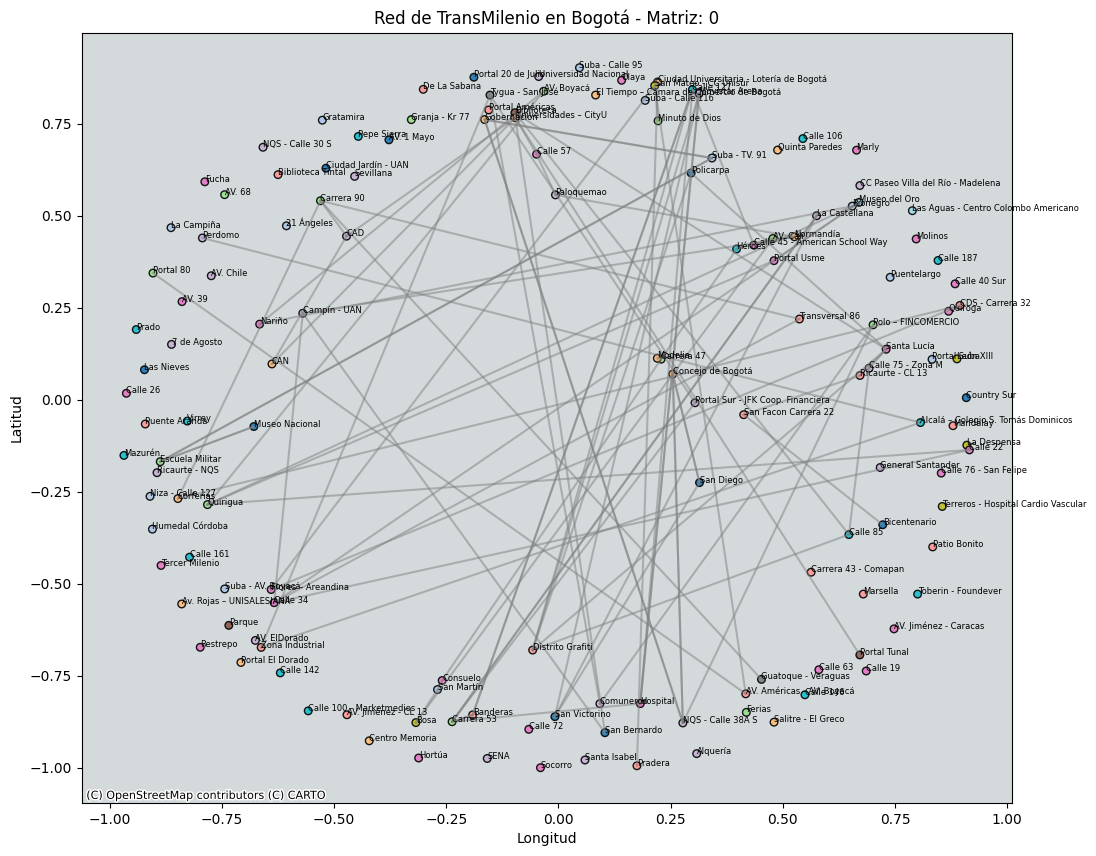

Listo. Se generó el grafo con asignación de colores por troncal y posiciones reales.


In [14]:
# Grafo de la Red de TransMilenio en Bogotá (Versión Mejorada)



# 2. Importar las librerías
import os
import numpy as np
import pandas as pd
import h5py
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

from google.colab import files


# 4. Verificar la existencia de los archivos en Colab
estaciones_path = "/content/estaciones.csv"
matrices_path = "/content/matrices_adyacencia.h5"

if os.path.exists(estaciones_path) and os.path.exists(matrices_path):
    print("Todos los archivos fueron encontrados correctamente.")
else:
    print("Error: Verifica que los archivos hayan sido subidos correctamente.")

# 5. Leer la información de las estaciones
estaciones_df = pd.read_csv(estaciones_path)
print(f"Se cargaron {len(estaciones_df)} estaciones desde estaciones.csv")

# 6. Cargar la matriz de adyacencia número 399 (o la novena en orden)
with h5py.File(matrices_path, "r") as f:
    # Listamos las claves disponibles
    keys = sorted(list(f.keys()))
    print("Matrices de adyacencia disponibles:", keys)

    # Vamos a intentar tomar la matriz en la posición 9 en el orden lexicográfico
    # (podría coincidir con la '399' si existe)
    if len(keys) > 90:
        target_key = keys[90]
        print(f"Cargando la matriz en la posición [9] del orden lexicográfico: '{target_key}'")
        adj_matrix = f[target_key][...]
    else:
        # Si no hay tantas matrices, cargamos la primera
        target_key = keys[0]
        print(f"Solo existen {len(keys)} matrices. Se cargará '{target_key}'.")
        adj_matrix = f[target_key][...]

print(f"Tamaño de la matriz de adyacencia seleccionada: {adj_matrix.shape}")

# 7. Crear el Grafo Dirigido
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
print("Grafo creado a partir de la matriz de adyacencia.")

# 8. Asignar posiciones a los nodos según coordenadas reales
# Suponemos que el orden de las filas/columnas de la matriz coincide con el
# orden de las estaciones en 'estaciones_df'.
if len(estaciones_df) == len(G.nodes()):
    pos_real = {}
    for i, node in enumerate(G.nodes()):
        x = estaciones_df.iloc[i]["coordenada_x_estacion"]
        y = estaciones_df.iloc[i]["coordenada_y_estacion"]
        pos_real[node] = (x, y)
    print("Se han asignado posiciones reales a cada nodo del grafo.")
else:
    # Si no coinciden, generamos una posición con layout automático
    print("Advertencia: El número de estaciones no coincide con la cantidad de nodos.")
    print("Se usará un layout automático (spring_layout).")
    pos_real = nx.spring_layout(G, seed=42)

# 9. Asignar colores según la troncal_estacion
unique_troncales = estaciones_df["troncal_estacion"].unique()
troncal_to_idx = {t: idx for idx, t in enumerate(unique_troncales)}
num_troncales = len(unique_troncales)
colormap = plt.cm.get_cmap("tab20", num_troncales)

node_colors = []
for i, node in enumerate(G.nodes()):
    # Troncal de la estación i
    troncal = estaciones_df.iloc[i]["troncal_estacion"]
    color_idx = troncal_to_idx[troncal]
    color = colormap(color_idx)
    node_colors.append(color)

# 10. Dibujar el grafo sobre un mapa base
fig, ax = plt.subplots(figsize=(12, 10))

# Dibujamos las aristas (conexiones)
for (u, v) in G.edges():
    x_origen, y_origen = pos_real[u]
    x_dest, y_dest = pos_real[v]
    ax.plot([x_origen, x_dest], [y_origen, y_dest], color="gray", alpha=0.5)

# Dibujamos los nodos
x_nodes = [pos_real[n][0] for n in G.nodes()]
y_nodes = [pos_real[n][1] for n in G.nodes()]
ax.scatter(x_nodes, y_nodes, c=node_colors, s=30, alpha=0.9, edgecolors="black")

# Añadimos etiquetas con el nombre de la estación (si deseas)
for i, node in enumerate(G.nodes()):
    nombre_est = estaciones_df.iloc[i]["nombre_estacion"]
    ax.text(pos_real[node][0], pos_real[node][1], nombre_est, fontsize=6)

# Añadir mapa base (requiere coordenadas en EPSG:4326)
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

ax.set_title(f"Red de TransMilenio en Bogotá - Matriz: {target_key}")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()

print("Listo. Se generó el grafo con asignación de colores por troncal y posiciones reales.")


Archivos encontrados correctamente.

Se cargaron 149 estaciones desde estaciones.csv
Estaciones después de remover NaN en coordenadas: 149

Matrices de adyacencia disponibles: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '8', '9']
Matriz '390' no existe. Se cargó '0' en su lugar.
Tamaño de la matriz de adyacencia: (145, 145)

[ADVERTENCIA] El número de estaciones difiere del número de nodos de la matriz.
Puede que el grafo se dibuje de forma inconsistente o falten nodos.

Grafo con 149 nodos y 33 aristas.

[ADVERTENCIA] No se pudo agregar el mapa base: cannot convert float NaN to integer
Posiblemente las co

<ipython-input-22-d1a558e89238>:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap         = plt.cm.get_cmap("tab20", len(unique_troncales))
/usr/local/lib/python3.11/dist-packages/contextily/tile.py:592: RuntimeWarning: invalid value encountered in subtract
  lon_length = np.subtract(*lon_range)
/usr/local/lib/python3.11/dist-packages/contextily/tile.py:597: RuntimeWarning: divide by zero encountered in scalar divide
  zoom_lat = np.ceil(np.log2(360 * 2.0 / lat_length))


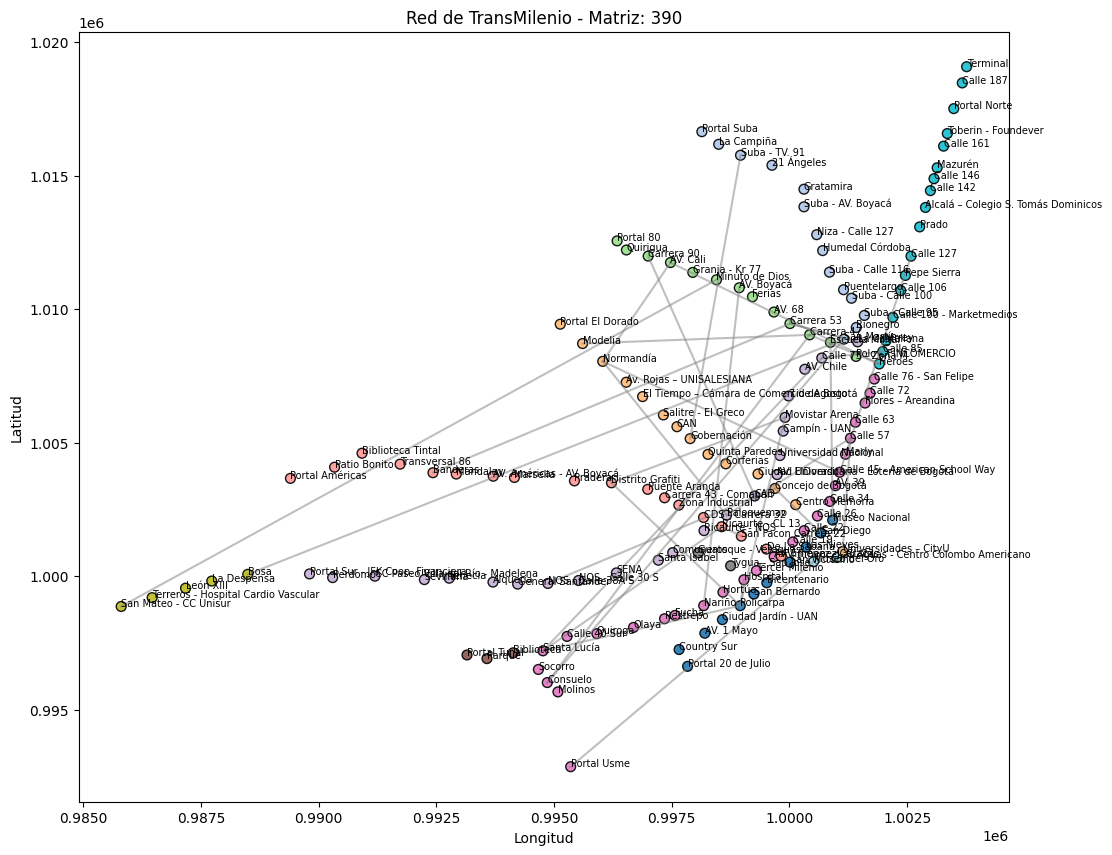


¡Listo! Se generó el grafo y se intentó superponer el mapa base de Bogotá.


In [22]:

import os
import numpy as np
import pandas as pd
import h5py
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

from google.colab import files



estaciones_path = "/content/estaciones.csv"
matrices_path   = "/content/matrices_adyacencia.h5"

if not (os.path.exists(estaciones_path) and os.path.exists(matrices_path)):
    print("Error: Verifica que hayas subido los archivos correctamente.")
else:
    print("Archivos encontrados correctamente.")

# ---------------------------------------------
# 2. Leer CSV de estaciones y limpiar datos NaN
# ---------------------------------------------
estaciones_df = pd.read_csv(estaciones_path)
print(f"\nSe cargaron {len(estaciones_df)} estaciones desde estaciones.csv")

# Filtramos filas con NaN en las coordenadas
estaciones_df = estaciones_df.dropna(subset=["coordenada_x_estacion", "coordenada_y_estacion"])
print(f"Estaciones después de remover NaN en coordenadas: {len(estaciones_df)}")

# ---------------------------------------------
# 3. Seleccionar la matriz de adyacencia
# ---------------------------------------------
matriz_deseada = "390"  # Cambia aquí la clave que desees

with h5py.File(matrices_path, "r") as f:
    keys = list(f.keys())
    print("\nMatrices de adyacencia disponibles:", keys)

    if matriz_deseada in keys:
        matriz_adyacencia = f[matriz_deseada][:]
        print(f"Matriz '{matriz_deseada}' cargada correctamente.")
    else:
        matriz_adyacencia = f[keys[0]][:]
        print(f"Matriz '{matriz_deseada}' no existe. Se cargó '{keys[0]}' en su lugar.")

print("Tamaño de la matriz de adyacencia:", matriz_adyacencia.shape)

# Verificamos que el número de filas en la matriz coincida con el número de estaciones
# (en caso contrario, habrá desfase en los índices).
num_nodos = matriz_adyacencia.shape[0]
if num_nodos != len(estaciones_df):
    print("\n[ADVERTENCIA] El número de estaciones difiere del número de nodos de la matriz.")
    print("Puede que el grafo se dibuje de forma inconsistente o falten nodos.")

# ---------------------------------------------
# 4. Construir el grafo dirigido
# ---------------------------------------------
G = nx.DiGraph()

# (A) Añadir nodos
for i, row in estaciones_df.iterrows():
    # El índice i en estaciones_df debe corresponder a la fila i de la matriz
    # Ajusta si tu DataFrame no está en el mismo orden que la matriz
    G.add_node(
        row["codigo_nodo_estacion"],
        nombre=row.get("nombre_estacion", ""),
        pos=(row["coordenada_x_estacion"], row["coordenada_y_estacion"])
    )

# (B) Añadir conexiones según la matriz
for i in range(num_nodos):
    for j in range(num_nodos):
        if matriz_adyacencia[i, j] > 0:
            # Estación i -> Estación j
            nodo_origen = estaciones_df.iloc[i]["codigo_nodo_estacion"]
            nodo_dest   = estaciones_df.iloc[j]["codigo_nodo_estacion"]
            G.add_edge(nodo_origen, nodo_dest)

print(f"\nGrafo con {len(G.nodes())} nodos y {len(G.edges())} aristas.")

# ---------------------------------------------
# 5. Asignar colores según la troncal_estacion
# ---------------------------------------------
if "troncal_estacion" not in estaciones_df.columns:
    print("[ADVERTENCIA] 'troncal_estacion' no existe en el CSV. Se usarán colores fijos.")
    node_colors = ["blue"] * len(G.nodes())
else:
    unique_troncales = estaciones_df["troncal_estacion"].unique()
    troncal_to_idx   = {t: idx for idx, t in enumerate(unique_troncales)}
    colormap         = plt.cm.get_cmap("tab20", len(unique_troncales))

    node_colors = []
    for i, node in enumerate(G.nodes()):
        troncal = estaciones_df.iloc[i].get("troncal_estacion", "")
        color_idx = troncal_to_idx.get(troncal, 0)
        node_colors.append(colormap(color_idx))

# ---------------------------------------------
# 6. Dibujar el grafo + mapa base
# ---------------------------------------------
plt.figure(figsize=(12, 10))

posiciones = nx.get_node_attributes(G, "pos")

# (A) Dibujamos aristas
for (u, v) in G.edges():
    x1, y1 = posiciones[u]
    x2, y2 = posiciones[v]
    plt.plot([x1, x2], [y1, y2], color="gray", alpha=0.5)

# (B) Dibujamos nodos
x_nodes = [posiciones[n][0] for n in G.nodes()]
y_nodes = [posiciones[n][1] for n in G.nodes()]
plt.scatter(x_nodes, y_nodes, c=node_colors, s=50, alpha=0.9, edgecolors="black")

# (C) Etiquetas
for i, n in enumerate(G.nodes()):
    nombre_est = G.nodes[n].get("nombre", str(n))
    plt.text(x_nodes[i], y_nodes[i], nombre_est, fontsize=7)

# (D) Agregar mapa base con manejo de error
try:
    ax = plt.gca()
    ctx.add_basemap(
        ax,
        crs="EPSG:4326",  # Asumiendo que (x,y) = (lon,lat)
        source=ctx.providers.CartoDB.Positron
    )
except Exception as e:
    print(f"\n[ADVERTENCIA] No se pudo agregar el mapa base: {e}")
    print("Posiblemente las coordenadas no estén en EPSG:4326 o el bounding box sea inválido.")

plt.title(f"Red de TransMilenio - Matriz: {matriz_deseada}")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

print("\n¡Listo! Se generó el grafo y se intentó superponer el mapa base de Bogotá.")


<ipython-input-42-2dd9b9919212>:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap         = plt.cm.get_cmap("tab20", len(unique_troncales))


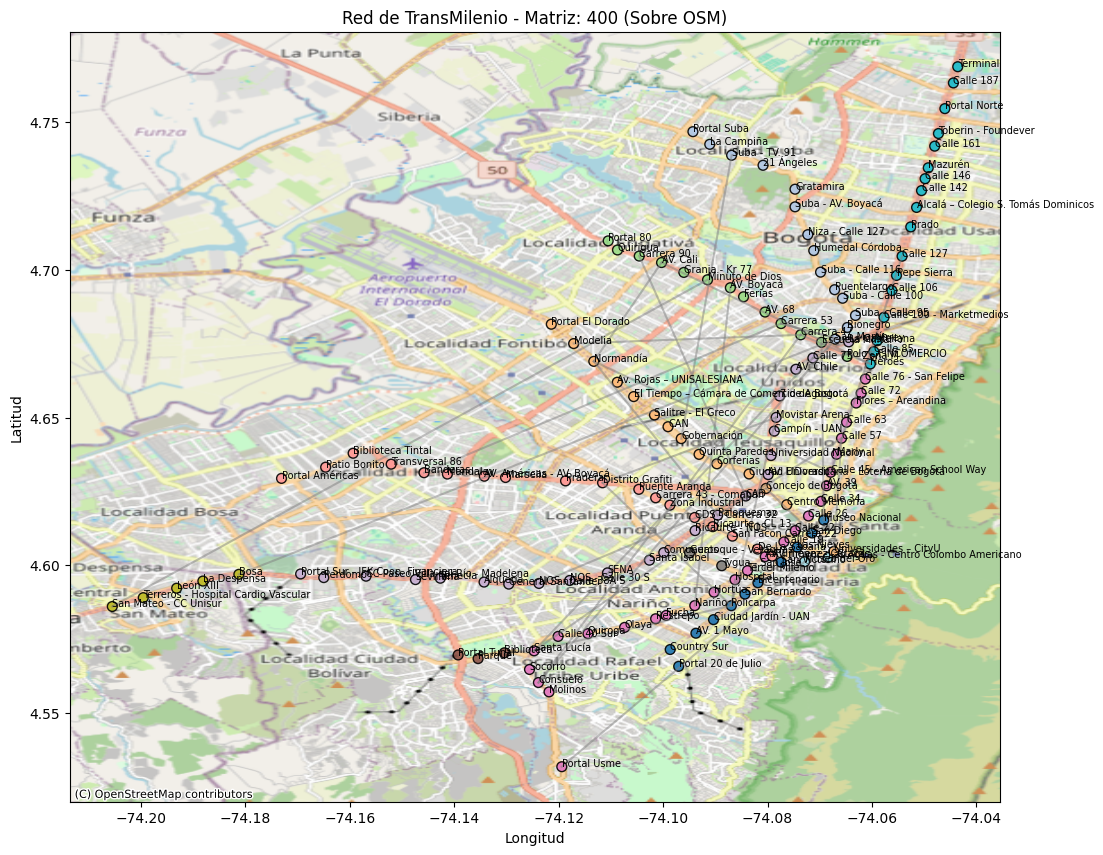

In [42]:
# ---------------------------------------------
# Grafo de TransMilenio con relieve (Stamen Terrain)
# y reproyección de coords locales (EPSG:3116) a EPSG:4326
# ---------------------------------------------


import os
import numpy as np
import pandas as pd
import h5py
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
from google.colab import files



# -------------------------------------------------
# 2. Leer estaciones y construir un GeoDataFrame
#    Suponiendo que tus coords están en EPSG:3116
# -------------------------------------------------
estaciones_df = pd.read_csv(estaciones_path)

# Crear la geometría para geopandas
# (X = coordenada_x_estacion, Y = coordenada_y_estacion)
geometry = [
    Point(xy) for xy in zip(
        estaciones_df["coordenada_x_estacion"],
        estaciones_df["coordenada_y_estacion"]
    )
]

# Creamos el GeoDataFrame con CRS EPSG:3116 (MAGNA-SIRGAS / Colombia)
gdf_estaciones = gpd.GeoDataFrame(
    estaciones_df,
    geometry=geometry,
    crs="EPSG:3116"  # Ajustar al CRS real de tus datos si es distinto
)

# Reproyectar a EPSG:4326 (lat/lon)
gdf_estaciones_4326 = gdf_estaciones.to_crs("EPSG:4326")

# Extraer lat/lon en columnas para el grafo
gdf_estaciones_4326["lon"] = gdf_estaciones_4326.geometry.x
gdf_estaciones_4326["lat"] = gdf_estaciones_4326.geometry.y

# -------------------------------------------------
# 3. Seleccionar la matriz de adyacencia
# -------------------------------------------------
matriz_deseada = "400"
with h5py.File(matrices_path, "r") as f:
    keys = list(f.keys())
    if matriz_deseada in keys:
        matriz_adyacencia = f[matriz_deseada][:]
    else:
        matriz_adyacencia = f[keys[0]][:]

# -------------------------------------------------
# 4. Construcción del grafo dirigido
# -------------------------------------------------
G = nx.DiGraph()
num_nodos = matriz_adyacencia.shape[0]

# (A) Añadir nodos con (lon, lat)
for i, row in gdf_estaciones_4326.iterrows():
    G.add_node(
        row["codigo_nodo_estacion"],
        nombre=row.get("nombre_estacion", ""),
        pos=(row["lon"], row["lat"])
    )

# (B) Añadir aristas
for i in range(num_nodos):
    for j in range(num_nodos):
        if matriz_adyacencia[i, j] > 0:
            nodo_origen = gdf_estaciones_4326.iloc[i]["codigo_nodo_estacion"]
            nodo_dest   = gdf_estaciones_4326.iloc[j]["codigo_nodo_estacion"]
            G.add_edge(nodo_origen, nodo_dest)

# -------------------------------------------------
# 5. Asignar colores según troncal_estacion
# -------------------------------------------------
if "troncal_estacion" not in gdf_estaciones_4326.columns:
    node_colors = ["blue"] * len(G.nodes())
else:
    unique_troncales = gdf_estaciones_4326["troncal_estacion"].unique()
    troncal_to_idx   = {t: idx for idx, t in enumerate(unique_troncales)}
    colormap         = plt.cm.get_cmap("tab20", len(unique_troncales))

    node_colors = []
    for i, node in enumerate(G.nodes()):
        troncal = gdf_estaciones_4326.iloc[i].get("troncal_estacion", "")
        node_colors.append(colormap(troncal_to_idx.get(troncal, 0)))

# -------------------------------------------------
# 6. Graficar sobre mapa base con relieve
# -------------------------------------------------
plt.figure(figsize=(12, 10))

posiciones = nx.get_node_attributes(G, "pos")  # Diccionario {nodo: (lon, lat)}

# Aristas
for (u, v) in G.edges():
    x1, y1 = posiciones[u]
    x2, y2 = posiciones[v]
    plt.plot([x1, x2], [y1, y2], color="gray", alpha=0.5)

# Nodos
x_nodes = [posiciones[n][0] for n in G.nodes()]
y_nodes = [posiciones[n][1] for n in G.nodes()]
plt.scatter(x_nodes, y_nodes, c=node_colors, s=50, alpha=0.9, edgecolors="black")

# Etiquetas
for i, n in enumerate(G.nodes()):
    nombre_est = G.nodes[n].get("nombre", str(n))
    plt.text(x_nodes[i], y_nodes[i], nombre_est, fontsize=7)

plt.title(f"Red de TransMilenio - Matriz: {matriz_deseada} (Sobre OSM)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

ax = plt.gca()
try:
    # Usamos un relieve de color para open Street maps
   ctx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=ctx.providers.OpenStreetMap.Mapnik
)

except Exception as e:
    print(f"[ADVERTENCIA] No se pudo mostrar el mapa base: {e}")

plt.show()



In [32]:

!pip install imageio

In [43]:
import os
import io
import numpy as np
import pandas as pd
import h5py
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import imageio
from shapely.geometry import Point
from google.colab import files

# -------------------------------------------------
# 1. Cargar estaciones y construir el GeoDataFrame
# -------------------------------------------------
# Asegúrate de definir la variable 'estaciones_path'
estaciones_df = pd.read_csv(estaciones_path)

# Crear la geometría para geopandas
geometry = [Point(xy) for xy in zip(estaciones_df["coordenada_x_estacion"],
                                      estaciones_df["coordenada_y_estacion"])]

gdf_estaciones = gpd.GeoDataFrame(estaciones_df, geometry=geometry, crs="EPSG:3116")
gdf_estaciones_4326 = gdf_estaciones.to_crs("EPSG:4326")
gdf_estaciones_4326["lon"] = gdf_estaciones_4326.geometry.x
gdf_estaciones_4326["lat"] = gdf_estaciones_4326.geometry.y

# -------------------------------------------------
# 2. Seleccionar la matriz de adyacencia
# -------------------------------------------------
# Asegúrate de definir la variable 'matrices_path'
matriz_deseada = "400"
with h5py.File(matrices_path, "r") as f:
    keys = list(f.keys())
    if matriz_deseada in keys:
        matriz_adyacencia = f[matriz_deseada][:]
    else:
        matriz_adyacencia = f[keys[0]][:]

# -------------------------------------------------
# 3. Construcción del grafo dirigido
# -------------------------------------------------
G = nx.DiGraph()
num_nodos = matriz_adyacencia.shape[0]

# (A) Añadir nodos con (lon, lat)
for i, row in gdf_estaciones_4326.iterrows():
    G.add_node(
        row["codigo_nodo_estacion"],
        nombre=row.get("nombre_estacion", ""),
        pos=(row["lon"], row["lat"])
    )

# (B) Añadir aristas según la matriz
for i in range(num_nodos):
    for j in range(num_nodos):
        if matriz_adyacencia[i, j] > 0:
            nodo_origen = gdf_estaciones_4326.iloc[i]["codigo_nodo_estacion"]
            nodo_dest = gdf_estaciones_4326.iloc[j]["codigo_nodo_estacion"]
            G.add_edge(nodo_origen, nodo_dest)

# -------------------------------------------------
# 4. Asignar colores a los nodos (estaciones)
# -------------------------------------------------
if "troncal_estacion" not in gdf_estaciones_4326.columns:
    node_colors = ["blue"] * len(G.nodes())
else:
    unique_troncales = gdf_estaciones_4326["troncal_estacion"].unique()
    troncal_to_idx = {t: idx for idx, t in enumerate(unique_troncales)}
    colormap = plt.cm.get_cmap("tab20", len(unique_troncales))
    node_colors = []
    for i, node in enumerate(G.nodes()):
        troncal = gdf_estaciones_4326.iloc[i].get("troncal_estacion", "")
        node_colors.append(colormap(troncal_to_idx.get(troncal, 0)))

# Obtener posiciones de nodos para usar en la animación
posiciones = nx.get_node_attributes(G, "pos")  # {nodo: (lon, lat)}

# -------------------------------------------------
# 5. SIMULACIÓN DE MOVIMIENTO DE BUSES Y CREACIÓN DE GIF
# -------------------------------------------------
# Parámetros de simulación
num_buses = 200      # Número de buses a simular
num_frames = 200     # Número total de frames de la animación
bus_speed = 0.1      # Incremento de progreso en cada frame (puede ajustarse)

# Inicializar el estado de cada bus:
# Cada bus se representa con un diccionario que contiene:
# - current_node: la estación actual (cuando no está en tránsito)
# - start_node y end_node: la arista actual por la que se desplaza
# - progress: valor entre 0 y 1 que indica el avance entre start_node y end_node
buses = []
nodes_list = list(G.nodes())
for _ in range(num_buses):
    start_node = np.random.choice(nodes_list)
    buses.append({
        'current_node': start_node,
        'start_node': start_node,
        'end_node': None,
        'progress': 0.0
    })

frames = []  # Para almacenar cada imagen de la simulación

# Bucle de simulación
for frame in range(num_frames):
    # Actualizar estado de cada bus
    for bus in buses:
        if bus['end_node'] is None:
            # Si el bus está en una estación, elegir aleatoriamente una arista saliente
            current_node = bus['current_node']
            outgoing_edges = list(G.out_edges(current_node))
            if outgoing_edges:
                _, next_node = outgoing_edges[np.random.randint(len(outgoing_edges))]
                bus['start_node'] = current_node
                bus['end_node'] = next_node
                bus['progress'] = 0.0
            # Si no hay salida, el bus permanece en la estación
        else:
            # El bus se encuentra en tránsito; avanzar en la arista
            bus['progress'] += bus_speed
            if bus['progress'] >= 1.0:
                # Llegó a la estación destino
                bus['current_node'] = bus['end_node']
                bus['start_node'] = bus['current_node']
                bus['end_node'] = None
                bus['progress'] = 0.0

    # Crear el gráfico para el frame actual
    plt.figure(figsize=(12, 10))
    ax = plt.gca()

    # Dibujar aristas de la red
    for (u, v) in G.edges():
        x1, y1 = posiciones[u]
        x2, y2 = posiciones[v]
        plt.plot([x1, x2], [y1, y2], color="gray", alpha=0.5)

    # Dibujar nodos (estaciones)
    x_nodes = [posiciones[n][0] for n in G.nodes()]
    y_nodes = [posiciones[n][1] for n in G.nodes()]
    plt.scatter(x_nodes, y_nodes, c=node_colors, s=50, alpha=0.9, edgecolors="black")

    # Dibujar buses: cada bus se representa como un punto rojo
    for bus in buses:
        if bus['end_node'] is None:
            # Bus en estación
            pos_bus = posiciones[bus['current_node']]
        else:
            # Bus en tránsito: interpolar posición entre la estación de salida y la de llegada
            start_pos = np.array(posiciones[bus['start_node']])
            end_pos = np.array(posiciones[bus['end_node']])
            pos_bus = start_pos + bus['progress'] * (end_pos - start_pos)
        plt.scatter(pos_bus[0], pos_bus[1], color='red', s=20)

    # Agregar mapa base con relieve
    try:
        ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.Mapnik)
    except Exception as e:
        print(f"[ADVERTENCIA] No se pudo cargar el mapa base: {e}")

    plt.title(f"Simulación de buses en TransMilenio - Frame {frame+1}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")

    # Guardar el frame en un buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    frame_image = imageio.imread(buf)
    frames.append(frame_image)
    plt.close()

# Guardar la animación en un archivo GIF
gif_filename = 'simulacion_buses.gif'
imageio.mimsave(gif_filename, frames, duration=0.1)  # duration controla la duración de cada frame

# Descargar el GIF (útil en Google Colab)
files.download(gif_filename)

# -------------------------------------------------
# NOTA:
# Para crear una "segunda simulación", podrías, por ejemplo,
# variar parámetros como 'bus_speed', 'num_buses' o 'num_frames', o
# incluso cambiar la lógica de asignación de rutas (por ejemplo, priorizar
# ciertos recorridos) y repetir la simulación generando otro GIF.
# -------------------------------------------------


<ipython-input-43-9113f8890e4c>:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("tab20", len(unique_troncales))
<ipython-input-43-9113f8890e4c>:171: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame_image = imageio.imread(buf)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
import os
import io
import numpy as np
import pandas as pd
import h5py
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import imageio
from shapely.geometry import Point
from google.colab import files
import random

# -------------------------------------------------
# 1. Cargar estaciones y construir el GeoDataFrame
# -------------------------------------------------
# Define la variable 'estaciones_path' con la ruta a tu CSV de estaciones
estaciones_df = pd.read_csv(estaciones_path)

# Crear la geometría para geopandas a partir de las coordenadas
geometry = [Point(xy) for xy in zip(estaciones_df["coordenada_x_estacion"],
                                      estaciones_df["coordenada_y_estacion"])]

gdf_estaciones = gpd.GeoDataFrame(estaciones_df, geometry=geometry, crs="EPSG:3116")
gdf_estaciones_4326 = gdf_estaciones.to_crs("EPSG:4326")
gdf_estaciones_4326["lon"] = gdf_estaciones_4326.geometry.x
gdf_estaciones_4326["lat"] = gdf_estaciones_4326.geometry.y

# -------------------------------------------------
# 2. Seleccionar la matriz de adyacencia y construir el grafo
# -------------------------------------------------
# Define la variable 'matrices_path' con la ruta a tu archivo HDF5 de matrices
matriz_deseada = "400"
with h5py.File(matrices_path, "r") as f:
    keys = list(f.keys())
    if matriz_deseada in keys:
        matriz_adyacencia = f[matriz_deseada][:]
    else:
        matriz_adyacencia = f[keys[0]][:]

G = nx.DiGraph()
num_nodos = matriz_adyacencia.shape[0]

# Añadir nodos con sus posiciones (lon, lat)
for i, row in gdf_estaciones_4326.iterrows():
    G.add_node(
        row["codigo_nodo_estacion"],
        nombre=row.get("nombre_estacion", ""),
        pos=(row["lon"], row["lat"])
    )

# Añadir aristas según la matriz de adyacencia
for i in range(num_nodos):
    for j in range(num_nodos):
        if matriz_adyacencia[i, j] > 0:
            nodo_origen = gdf_estaciones_4326.iloc[i]["codigo_nodo_estacion"]
            nodo_dest = gdf_estaciones_4326.iloc[j]["codigo_nodo_estacion"]
            G.add_edge(nodo_origen, nodo_dest)

# -------------------------------------------------
# 3. Asignar colores a los nodos (estaciones)
# -------------------------------------------------
if "troncal_estacion" not in gdf_estaciones_4326.columns:
    node_colors = ["blue"] * len(G.nodes())
else:
    unique_troncales = gdf_estaciones_4326["troncal_estacion"].unique()
    troncal_to_idx = {t: idx for idx, t in enumerate(unique_troncales)}
    colormap_nodes = plt.cm.get_cmap("tab20", len(unique_troncales))
    node_colors = []
    for i, node in enumerate(G.nodes()):
        troncal = gdf_estaciones_4326.iloc[i].get("troncal_estacion", "")
        node_colors.append(colormap_nodes(troncal_to_idx.get(troncal, 0)))

# Diccionario de posiciones para los nodos
posiciones = nx.get_node_attributes(G, "pos")

# -------------------------------------------------
# 4. Precalcular rutas fijas para los buses
# -------------------------------------------------
num_routes = 10       # Número de rutas diferentes
route_length = 50     # Cantidad de paradas por ruta
nodes_list = list(G.nodes())
routes = {}

for route_id in range(num_routes):
    # Elegir una estación de inicio al azar
    start_node = random.choice(nodes_list)
    route = [start_node]
    current_node = start_node
    for _ in range(route_length - 1):
        outgoing_edges = list(G.out_edges(current_node))
        if outgoing_edges:
            # Seleccionar aleatoriamente una arista saliente
            _, next_node = random.choice(outgoing_edges)
            route.append(next_node)
            current_node = next_node
        else:
            break
    routes[route_id] = route

# Definir colormap para las rutas (colores de buses)
route_colormap = plt.cm.get_cmap("tab10", num_routes)

# -------------------------------------------------
# 5. Inicializar los buses
# -------------------------------------------------
num_buses = 500
buses = []

for _ in range(num_buses):
    # Asignar aleatoriamente un id de ruta de entre los num_routes
    ruta_id = random.randint(0, num_routes - 1)
    ruta = routes[ruta_id]
    # Si la ruta tiene al menos dos paradas, asignar un segmento y avance inicial
    if len(ruta) < 2:
        current_segment = 0
        progress = 0.0
    else:
        current_segment = random.randint(0, len(ruta) - 2)
        progress = random.random()  # Progreso inicial entre 0 y 1

    buses.append({
        'ruta_id': ruta_id,
        'ruta': ruta,
        'current_segment': current_segment,
        'progress': progress
    })

# -------------------------------------------------
# 6. Simulación y creación de la animación (GIF)
# -------------------------------------------------
num_frames = 200    # Total de frames de la animación
bus_speed = 0.02    # Incremento de progreso por frame (ajustable)

frames = []  # Lista para almacenar cada imagen

for frame in range(num_frames):
    # Actualizar posición de cada bus a lo largo de su ruta
    for bus in buses:
        # Avanzar en el segmento actual
        bus['progress'] += bus_speed
        if bus['progress'] >= 1.0:
            bus['progress'] -= 1.0
            # Avanzar al siguiente segmento de la ruta (cíclico)
            if len(bus['ruta']) > 1:
                bus['current_segment'] = (bus['current_segment'] + 1) % (len(bus['ruta']) - 1)
            else:
                bus['current_segment'] = 0

    # Crear figura para el frame actual
    plt.figure(figsize=(12, 10))
    ax = plt.gca()

    # Dibujar las aristas de la red
    for (u, v) in G.edges():
        x1, y1 = posiciones[u]
        x2, y2 = posiciones[v]
        plt.plot([x1, x2], [y1, y2], color="gray", alpha=0.5)

    # Dibujar nodos (estaciones)
    x_nodes = [posiciones[n][0] for n in G.nodes()]
    y_nodes = [posiciones[n][1] for n in G.nodes()]
    plt.scatter(x_nodes, y_nodes, c=node_colors, s=50, alpha=0.9, edgecolors="black")

    # Dibujar buses con el color asignado según su ruta
    for bus in buses:
        ruta = bus['ruta']
        seg = bus['current_segment']
        # Si el bus no tiene un siguiente nodo, se dibuja en la parada actual
        if seg >= len(ruta) - 1:
            pos_bus = posiciones[ruta[-1]]
        else:
            start_node = ruta[seg]
            end_node = ruta[seg + 1]
            start_pos = np.array(posiciones[start_node])
            end_pos = np.array(posiciones[end_node])
            pos_bus = start_pos + bus['progress'] * (end_pos - start_pos)
        # Color según la ruta del bus
        bus_color = route_colormap(bus['ruta_id'])
        plt.scatter(pos_bus[0], pos_bus[1], color=bus_color, s=20)

    # Agregar mapa base con relieve
    try:
        ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.Mapnik)
    except Exception as e:
        print(f"[ADVERTENCIA] No se pudo cargar el mapa base: {e}")

    plt.title(f"Simulación de 500 buses en TransMilenio - Frame {frame+1}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")

    # Guardar el frame en un buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    frame_image = imageio.imread(buf)
    frames.append(frame_image)
    plt.close()

# Guardar la animación en un archivo GIF
gif_filename = 'simulacion_buses_coloreados.gif'
imageio.mimsave(gif_filename, frames, duration=0.1)  # 'duration' controla el tiempo por frame

# Descargar el GIF (útil en Google Colab)
files.download(gif_filename)


<ipython-input-44-e6b5202080a3>:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap_nodes = plt.cm.get_cmap("tab20", len(unique_troncales))
<ipython-input-44-e6b5202080a3>:103: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  route_colormap = plt.cm.get_cmap("tab10", num_routes)
<ipython-input-44-e6b5202080a3>:197: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame_image = imageio.imread(buf)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import os
import io
import numpy as np
import pandas as pd
import h5py
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import imageio
from shapely.geometry import Point
from google.colab import files
import random

# -------------------------------------------------
# 1. Cargar estaciones y construir el GeoDataFrame
# -------------------------------------------------
# Define la variable 'estaciones_path' con la ruta a tu CSV de estaciones
estaciones_df = pd.read_csv(estaciones_path)

# Crear la geometría para geopandas a partir de las coordenadas
geometry = [Point(xy) for xy in zip(estaciones_df["coordenada_x_estacion"],
                                      estaciones_df["coordenada_y_estacion"])]

gdf_estaciones = gpd.GeoDataFrame(estaciones_df, geometry=geometry, crs="EPSG:3116")
gdf_estaciones_4326 = gdf_estaciones.to_crs("EPSG:4326")
gdf_estaciones_4326["lon"] = gdf_estaciones_4326.geometry.x
gdf_estaciones_4326["lat"] = gdf_estaciones_4326.geometry.y

# -------------------------------------------------
# 2. Seleccionar la matriz de adyacencia y construir el grafo
# -------------------------------------------------
# Define la variable 'matrices_path' con la ruta a tu archivo HDF5 de matrices
matriz_deseada = "400"
with h5py.File(matrices_path, "r") as f:
    keys = list(f.keys())
    if matriz_deseada in keys:
        matriz_adyacencia = f[matriz_deseada][:]
    else:
        matriz_adyacencia = f[keys[0]][:]

G = nx.DiGraph()
num_nodos = matriz_adyacencia.shape[0]

# Añadir nodos con sus posiciones (lon, lat)
for i, row in gdf_estaciones_4326.iterrows():
    G.add_node(
        row["codigo_nodo_estacion"],
        nombre=row.get("nombre_estacion", ""),
        pos=(row["lon"], row["lat"])
    )

# Añadir aristas según la matriz de adyacencia
for i in range(num_nodos):
    for j in range(num_nodos):
        if matriz_adyacencia[i, j] > 0:
            nodo_origen = gdf_estaciones_4326.iloc[i]["codigo_nodo_estacion"]
            nodo_dest = gdf_estaciones_4326.iloc[j]["codigo_nodo_estacion"]
            G.add_edge(nodo_origen, nodo_dest)

# -------------------------------------------------
# 3. Asignar colores a los nodos (estaciones)
# -------------------------------------------------
if "troncal_estacion" not in gdf_estaciones_4326.columns:
    node_colors = ["blue"] * len(G.nodes())
else:
    unique_troncales = gdf_estaciones_4326["troncal_estacion"].unique()
    troncal_to_idx = {t: idx for idx, t in enumerate(unique_troncales)}
    colormap_nodes = plt.cm.get_cmap("tab20", len(unique_troncales))
    node_colors = []
    for i, node in enumerate(G.nodes()):
        troncal = gdf_estaciones_4326.iloc[i].get("troncal_estacion", "")
        node_colors.append(colormap_nodes(troncal_to_idx.get(troncal, 0)))

# Diccionario de posiciones para los nodos
posiciones = nx.get_node_attributes(G, "pos")

# -------------------------------------------------
# 4. Generar 100 rutas aleatorias por todo el grafo
# -------------------------------------------------
num_routes = 200       # Número de rutas diferentes
route_length = 30      # Cantidad de paradas por ruta
nodes_list = list(G.nodes())
routes = {}

for route_id in range(num_routes):
    start_node = random.choice(nodes_list)
    route = [start_node]
    current_node = start_node
    for _ in range(route_length - 1):
        outgoing_edges = list(G.out_edges(current_node))
        if outgoing_edges:
            # Seleccionar aleatoriamente una arista saliente
            _, next_node = random.choice(outgoing_edges)
            route.append(next_node)
            current_node = next_node
        else:
            break
    routes[route_id] = route

# Definir colormap para las rutas, usando un cmap continuo para 100 colores distintos
route_colormap = plt.cm.get_cmap("hsv", num_routes)

# -------------------------------------------------
# 5. Inicializar los buses
# -------------------------------------------------
num_buses = 400  # Se disminuye a 300 buses
buses = []

for _ in range(num_buses):
    # Asignar aleatoriamente un id de ruta de entre los num_routes
    ruta_id = random.randint(0, num_routes - 1)
    ruta = routes[ruta_id]
    if len(ruta) < 2:
        current_segment = 0
        progress = 0.0
    else:
        current_segment = random.randint(0, len(ruta) - 2)
        progress = random.random()  # Progreso inicial aleatorio

    buses.append({
        'ruta_id': ruta_id,
        'ruta': ruta,
        'current_segment': current_segment,
        'progress': progress
    })

# -------------------------------------------------
# 6. Simulación y creación de la animación (GIF)
# -------------------------------------------------
num_frames = 300    # Total de frames de la animación
bus_speed = 0.02    # Incremento de progreso por frame

frames = []  # Lista para almacenar cada imagen

for frame in range(num_frames):
    # Actualizar posición de cada bus a lo largo de su ruta
    for bus in buses:
        bus['progress'] += bus_speed
        if bus['progress'] >= 1.0:
            bus['progress'] -= 1.0
            if len(bus['ruta']) > 1:
                bus['current_segment'] = (bus['current_segment'] + 1) % (len(bus['ruta']) - 1)
            else:
                bus['current_segment'] = 0

    # Crear figura para el frame actual
    plt.figure(figsize=(12, 10))
    ax = plt.gca()

    # Dibujar las aristas del grafo
    for (u, v) in G.edges():
        x1, y1 = posiciones[u]
        x2, y2 = posiciones[v]
        plt.plot([x1, x2], [y1, y2], color="gray", alpha=0.5)

    # Dibujar nodos (estaciones)
    x_nodes = [posiciones[n][0] for n in G.nodes()]
    y_nodes = [posiciones[n][1] for n in G.nodes()]
    plt.scatter(x_nodes, y_nodes, c=node_colors, s=50, alpha=0.9, edgecolors="black")

    # Dibujar buses según su ruta y color asignado
    for bus in buses:
        ruta = bus['ruta']
        seg = bus['current_segment']
        if seg >= len(ruta) - 1:
            pos_bus = posiciones[ruta[-1]]
        else:
            start_node = ruta[seg]
            end_node = ruta[seg + 1]
            start_pos = np.array(posiciones[start_node])
            end_pos = np.array(posiciones[end_node])
            pos_bus = start_pos + bus['progress'] * (end_pos - start_pos)
        bus_color = route_colormap(bus['ruta_id'])
        plt.scatter(pos_bus[0], pos_bus[1], color=bus_color, s=20)

    # Agregar mapa base con relieve
    try:
        ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.Mapnik)
    except Exception as e:
        print(f"[ADVERTENCIA] No se pudo cargar el mapa base: {e}")

    plt.title(f"Representación de 400 buses en TransMilenio - Troncal - Frame {frame+1}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")

    # Guardar el frame en un buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    frame_image = imageio.imread(buf)
    frames.append(frame_image)
    plt.close()

# Guardar la animación en un archivo GIF
gif_filename = 'representacion_400_buses_200_rutas.gif'
imageio.mimsave(gif_filename, frames, duration=0.1)

# Descargar el GIF (útil en Google Colab)
files.download(gif_filename)


<ipython-input-47-d23977531b1d>:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap_nodes = plt.cm.get_cmap("tab20", len(unique_troncales))
<ipython-input-47-d23977531b1d>:102: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  route_colormap = plt.cm.get_cmap("hsv", num_routes)
<ipython-input-47-d23977531b1d>:191: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame_image = imageio.imread(buf)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>